# Coefficient Sensitivity Analysis

## Mathematical Background
The next step is to quantize the filter coefficients. The coefficients will be represented as two's compliment with an integer width of $b_{i}$ and fractional width of $b_{f}$; $b_{w}=b_{i}+b_{f}+1$. This creates errors in the transfer function response. The analysis bounds the errors into an an acceptable range. Each of the coefficients are individually evaluated for the resultant error with the small deviations caused by quantization.

Below is the sensitivity of a transfer function $G(\delta)$ with respect to a parameter $m$

Using the sensitivity measure $S_{m}^{G(\delta)}\left(\delta\right)$, an estimate for the transfer function response deviation $\epsilon_{m}\left(\delta\right)$ with respect to a parameter deviation $\delta_{m}$ takes the form of $\epsilon_{m}\left(\delta\right)=\delta_{m}S_{m}^{G(\delta)}\left(\delta\right)$.

Applying the previously defined sensitivity measure to the feedback and feedforward coefficients $\tilde{\alpha}$ and $\tilde{\beta}$, the sensitivity functions with respect to the ith element of $\tilde{\alpha}$ and $\tilde{\beta}$ coefficients can be written as

$S_{\alpha_{i}}^{\tilde{H}_{\Sigma\Delta}^{'}(\delta)}(\delta)=\frac{\partial\tilde{H}_{\Sigma\Delta}^{'}(\delta)}{\partial\alpha_{i}}$

$=\tilde{H}_{\Sigma\Delta}^{'}(\delta)\cdot\left[T_{s}^{T}T_{0}^{T}\left(\delta I-A_{\delta}^{T}\right)^{-1}C_{\delta}^{T}\right]$

$S_{\beta_{i}}^{\tilde{H}_{\Sigma\Delta}^{'}(\delta)}(\delta)=\frac{\partial\tilde{H}_{\Sigma\Delta}^{'}(\delta)}{\partial\beta_{i}}$

$=T_{s}^{T}T_{0}^{T}\left(\delta I-A_{\delta}^{T}\right)^{-1}C_{\delta}^{T}$

$S_{\beta_{0}}^{\tilde{H}_{\Sigma\Delta}^{'}(\delta)}(\delta)=\frac{\partial\tilde{H}_{\Sigma\Delta}^{'}(\delta)}{\partial\beta_{0}}$

$=C_{\delta}\left(\delta I-A_{\delta}\right)^{-1}A_{\delta}T_{0}\left[\begin{array}{cccc}
1 & 0 & \cdots & 0\end{array}\right]^{T}+1$

The $\alpha_{i}$ and $\beta_{i}$ coefficient multiplexers connect to the same summation node and can be quantized to the same level. By combing the coefficient sensitivities at each node, a new sensitivity matrix can be formed.

$S^{\tilde{H}_{\Sigma\Delta}^{'}(\delta)}\left(\delta\right)=\left[\begin{array}{c}
S_{\beta_{0}}^{\tilde{H}_{\Sigma\Delta}^{'}(\delta)}(\delta)\\
S_{\beta_{1}}^{\tilde{H}_{\Sigma\Delta}^{'}(\delta)}(\delta)+S_{\alpha_{1}}^{\tilde{H}_{\Sigma\Delta}^{'}(\delta)}(\delta)\\
S_{\beta_{2}}^{\tilde{H}_{\Sigma\Delta}^{'}(\delta)}(\delta)+S_{\alpha_{2}}^{\tilde{H}_{\Sigma\Delta}^{'}(\delta)}(\delta)\\
\vdots\\
S_{\beta_{N}}^{\tilde{H}_{\Sigma\Delta}^{'}(\delta)}(\delta)+S_{\alpha_{N}}^{\tilde{H}_{\Sigma\Delta}^{'}(\delta)}(\delta)
\end{array}\right]^{T}$

The overall magnitude of the transfer function sensitivity can be found with the variation of the ideal transfer function magnitude, $\Delta\left|\tilde{H}_{\Sigma\Delta}^{'}(e^{j\omega})\right|$, with respect to $\Delta_{qi}$ changes in the ith numerator and denominator coefficients. 

$\left|S_{i}^{\tilde{H}_{\Sigma\Delta}^{'}(\delta)}\left(e^{j\omega}\right)\right|=\left|S_{\beta_{i}}^{\left|\tilde{H}_{\Sigma\Delta}^{'}(e^{j\omega})\right|}(e^{j\omega})+S_{\alpha_{i}}^{\left|\tilde{H}_{\Sigma\Delta}^{'}(e^{j\omega})\right|}(e^{j\omega})\right|$

$\leq\left|S_{\beta_{i}}^{\tilde{H}_{\Sigma\Delta}^{'}(e^{j\omega})}(e^{j\omega})+S_{\alpha_{i}}^{\tilde{H}_{\Sigma\Delta}^{'}(e^{j\omega})}(e^{j\omega})\right|$

The right hand side of the above inequality can be used as a conservative estimate for $\left|S_{i}^{\tilde{H}_{\Sigma\Delta}^{'}(\delta)}\left(e^{j\omega}\right)\right|$. An approximation to the transfer function variation can then be computed by

$\Delta\left|\tilde{H}_{\Sigma\Delta}^{'}\left(\delta\right)\right|\le\left|S^{\tilde{H}_{\Sigma\Delta}^{'}(\delta)}\left(\delta\right)\right|\Delta_{q}$

where $\Delta_{q}=\left[\begin{array}{cccc}\Delta_{q_{0}} \Delta_{q_{1}} \cdots \Delta_{q_{N}}\end{array}\right]^{T}$ is a vector quantization levels at each filter node. The transfer function magnitude variation, $\Delta\left|\tilde{H}_{\Sigma\Delta}^{'}\left(\delta\right)\right|$, due to coefficient quantization will later be used as a performance metric for choosing the appropriate quantization levels of the filter nodes with the overall $\Sigma\Delta$ filter architecture.

[$\Sigma\Delta$ Stream Computation](https://escholarship.org/uc/item/4f46n0h6)

In [1]:
# %load ./header.py
import numpy as np
from scipy import signal
from scipy import linalg
import control
import matplotlib.pyplot as plt
from IPython.display import Image

import sys

if '../sdfpy' not in sys.path:
  sys.path.insert(0,'../sdfpy')

import sd_sim
import sdfpy as sdf

OSR = 256      # oversample ratio
fb = 22050     # nyquist
fs = OSR*2*fb  # sampling frequency
ts = 1/fs      # sampling period


In [2]:
%store -r
[Ad,Bd,Cd,Dd,k,k_inv,T0,Ts,f,ts,alpha,beta] = the_delta_filter

## Interconnecting State Space Models 
Below shows how the control.series() function connects two state space models in series

$\left[\begin{matrix}\left[\begin{matrix}A_{1} & 0\\B_{2} C_{1} & A_{2}\end{matrix}\right] & \left[\begin{matrix}B_{1}\\B_{2} D_{1}\end{matrix}\right]\\\left[\begin{matrix}D_{2} C_{1} & C_{2}\end{matrix}\right] & \left[\begin{matrix}D_{2} D_{1}\end{matrix}\right]\end{matrix}\right]$

The block matrix below demonstrates how to merge the outputs of  two state space models

$\left[\begin{matrix}\left[\begin{matrix}A_{1} & 0\\0 & A_{2}\end{matrix}\right] & \left[\begin{matrix}B_{1}\\B_{2}\end{matrix}\right]\\\left[\begin{matrix}C_{1} & 0\\0 & C_{2}\end{matrix}\right] & \left[\begin{matrix}D_{1}\\D_{2}\end{matrix}\right]\end{matrix}\right]$


[Combining and Connecting Linear, Multi-Input, Multi-Output Subsystem Models](https://www.nasa.gov/centers/dryden/pdf/88038main_H-1264.pdf)

In [3]:
def ss_concat_outputs(sys_0, sys_1):
  A = linalg.block_diag(sys_0.A, sys_1.A)
  B = np.vstack(       (sys_0.B, sys_1.B))
  C = linalg.block_diag(sys_0.C, sys_1.C)
  D = np.vstack(       (sys_0.D, sys_1.D))
  return control.ss(A,B,C,D)

## Implementation

$\Delta\left|\tilde{H}_{\Sigma\Delta}^{'}\left(\delta\right)\right|$ can be implemented as a network of state space models as shown below

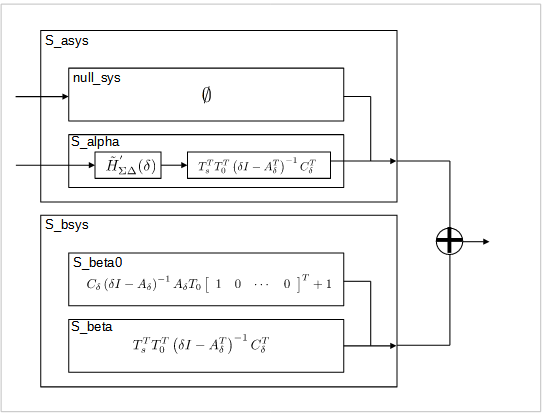

In [4]:
Image(filename='./Figures/SD_dIIR_Sensitivity.png')

In [5]:
# %Sensitivity due to feedthrough coefficient
B_beta = np.zeros((1, Ad.shape[1])).T
B_beta[0][0] = 1
B_beta = Ad @ T0 @ B_beta
S_beta0 = control.ss(Ad,B_beta,Cd,1)

# %Sensitivity due to numerator coefficients
S_beta = control.ss(Ad.T,Cd.T,Ts.T @ T0.T,0)

# %Sensitivity due to denominator coefficients
H = control.ss(Ad,Bd,Cd,Dd)
S_alpha = control.series(H, S_beta)
S_bsys = sdf.ss_concat_outputs(S_beta0, S_beta)
null_sys = control.ss(0, 0, 0, 0)
S_asys = sdf.ss_concat_outputs(null_sys, S_alpha)

[S_bmag,S_bphz] = sdf.delta_bode(S_bsys.A,S_bsys.B,S_bsys.C,S_bsys.D,f,ts)
[S_amag,S_aphz] = sdf.delta_bode(S_asys.A,S_asys.B,S_asys.C,S_asys.D,f,ts)
S_mag = np.squeeze(S_bmag + S_amag)
S_phz = np.squeeze(S_bphz + S_aphz)

In [6]:
print(S_mag)
print(S_phz)
the_sensitivity = [S_mag, S_phz]
%store the_sensitivity

[[2.78277516e-07 2.81011358e-07 2.83772057e-07 ... 1.00390846e+00
  1.00383349e+00 1.00375998e+00]
 [2.98325913e-08 2.98325912e-08 2.98325911e-08 ... 4.97712973e-06
  4.92834481e-06 4.88004510e-06]
 [1.18626390e-10 1.20919147e-10 1.23257174e-10 ... 2.01935499e-07
  1.98010897e-07 1.94162850e-07]
 [1.01947478e-07 1.02947608e-07 1.03957577e-07 ... 8.19330465e-09
  7.95590638e-09 7.72539774e-09]
 [8.93782589e-05 8.93782628e-05 8.93782667e-05 ... 3.67608472e-10
  3.55402721e-10 3.43693349e-10]]
[[ 8.99997353e+01  8.99997277e+01  8.99997198e+01 ...  4.51688310e-01
   4.47277045e-01  4.42909183e-01]
 [-1.14272093e-02 -1.15496087e-02 -1.16735123e-02 ... -1.79321880e+02
  -1.79342018e+02 -1.79362090e+02]
 [ 3.55725739e+02  3.55764981e+02  3.55803883e+02 ... -8.71755823e-03
  -3.56550021e-02 -6.25935827e-02]
 [ 1.75636689e+02  1.75678460e+02  1.75719819e+02 ...  1.79991293e+02
   1.79964356e+02  1.79937418e+02]
 [-3.26705366e-02 -3.29914979e-02 -3.33156123e-02 ...  5.03097313e+01
   5.15932607e

Goto the next step - [Noise Analysis](./4_dDFIIt_noise_gain.ipynb)